In [115]:
#TODO: Make Title

# Title

In [116]:
#TODO Title

# Abstract

In [117]:
#TODO Abstract
#TODO What is the problem
#TODO What dat is being used
#TODO What techniques were applied
#TODO What are the results

In [118]:

import spacy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from FakeNews.Tokenizer import Tokenizer
from FakeNews.Data import Data
from FakeNews.Cleaner import Cleaner
from FakeNews.Filter import Filter
from FakeNews.Lemmatizer import Lemmatizer
from FakeNews.Predictor import Predictor
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Introduction

In [119]:
#TODO Introduction
#TODO What is the problem
#TODO What data will be used
#TODO What techniques will be applied
#TODO How will models be evaluated

# Data loading / Initial Exploration

In [120]:
data = Data()
data.load()
data.df.sample(5, random_state=27)

,title,text,subject,date,Real
41686,BLACK LIVES MATTER TERRORISTS Take To Social M...,There are no words for these selfish sub-human...,left-news,"Jul 15, 2016",False
18804,Russian hacker wanted by U.S. tells court he w...,MOSCOW (Reuters) - A Russian hacker arrested i...,worldnews,"September 28, 2017",True
7967,"Kansas, ACLU reach temporary agreement on vote...",(Reuters) - The Kansas Secretary of State and ...,politicsNews,"September 29, 2016",True
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,politics,18-Feb-18,False
35606,AFTER GM’S TAXPAYER BAILOUT AND $10 BILLION IN...,Was the GM bailout REALLY about American jobs?...,politics,"Mar 31, 2016",False


In [121]:
data.df.shape
shape_str = f'The data frame has {data.df.shape[0]} rows and {data.df.shape[1]} columns'
print(shape_str)

The data frame has 44898 rows and 5 columns


In [122]:
print('The following columns are present in the data frame:')
print('\t'.join(data.df.columns))

The following columns are present in the data frame:
title	text	subject	date	Real


In [123]:
data.df.info()
print('The columns contain string objects except for Real which contains booleans')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Real     44898 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.4+ MB
The columns contain string objects except for Real which contains booleans


In [124]:
data.df.isna().sum()
print('There are no nan values in the data frame')

There are no nan values in the data frame


In [125]:
print(f'There are {data.df[data.df.duplicated()].shape[0]} rows with exact duplicates in the data frame')
data.df[data.df.duplicated()]

There are 209 rows with exact duplicates in the data frame


,title,text,subject,date,Real
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",True
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",True
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",True
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",True
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",True
...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",True
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",True
31359,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",False
32863,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",False


In [126]:
print(f'There are {data.df[(data.df.duplicated(subset = 'text') | data.df.duplicated(subset = 'title'))].shape[0]} rows with either duplicated text or duplicated titles')
data.df[(data.df.duplicated(subset = 'text') | data.df.duplicated(subset = 'title'))]

There are 6628 rows with either duplicated text or duplicated titles


,title,text,subject,date,Real
166,Factbox: What is in the U.S. Republicans' fina...,(Reuters) - Republicans in the U.S. Congress r...,politicsNews,"December 14, 2017",True
250,Aide tries to refocus U.S. tax debate after Tr...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"December 7, 2017",True
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",True
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",True
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",False
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",False
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",False
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",False


In [127]:
print(f'There are {data.df[data.df.date.str.contains('http') | data.df.date.str.contains('MSNBC')].shape[0]} articles whose date is not formatted correctly')
data.df[data.df.date.str.contains('http') | data.df.date.str.contains('MSNBC')]

There are 10 articles whose date is not formatted correctly


,title,text,subject,date,Real
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,False
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,False
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,False
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,False
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,False
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,False
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,False
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,False
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,False
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,False


The articles are evenly balanced between real and fake articles


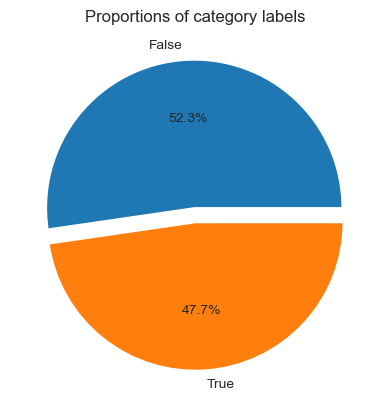

In [128]:
data.df.Real.value_counts().plot.pie(autopct = '%.1f%%', explode = [.05] * 2)
plt.ylabel('')
plt.title('Proportions of category labels')
print('The articles are evenly balanced between real and fake articles')

Text(0.5, 1.0, 'Histogram of Article Title Word Count')

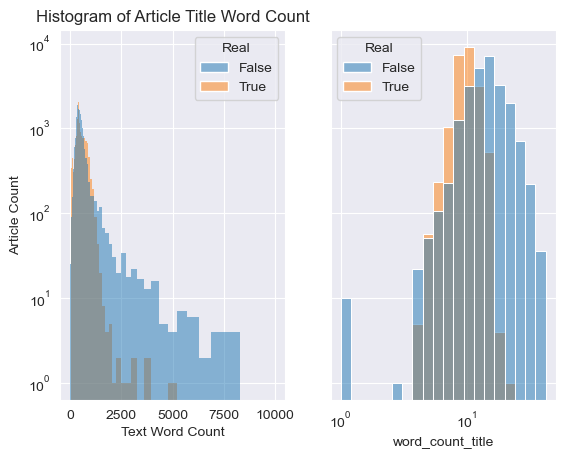

In [129]:
data.df['word_count_text'] = data.df.text.str.split().apply(len)
data.df['word_count_title'] = data.df.title.str.split().apply(len)
fig, axes = plt.subplots(1,2, sharey=True)
plt.loglog()
sns.histplot(data.df, x = 'word_count_text', ax=axes[0], hue = 'Real', bins = np.logspace(0, 4, 100))
sns.histplot(data.df, x = 'word_count_title', ax=axes[1], hue = 'Real', bins = 20)
axes[0].set_ylabel('Article Count')
axes[0].set_xlabel('Text Word Count')
axes[0].set_title('Histogram of Article Body Word Count')
axes[0].set_title('Histogram of Article Title Word Count')

In [130]:
print(f'There are {data.df[data.df.word_count_text < data.df.word_count_title].shape[0]} article stubs whose text word count is less than their title word count')
data.df[data.df.word_count_text < data.df.word_count_title]

There are 954 article stubs whose text word count is less than their title word count


,title,text,subject,date,Real,word_count_text,word_count_title
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",True,0,4
32340,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",False,0,15
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",False,0,19
32534,MY FAVORITE EXCUSES…Featuring Hillary Rotten C...,Enjoy:,politics,"Apr 17, 2017",False,1,7
32607,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",False,0,13
...,...,...,...,...,...,...,...
43244,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",False,0,11
43274,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",False,0,12
43285,THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...,Hillary Clinton s supporters were calling cert...,left-news,"Apr 12, 2015",False,31,39
43290,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",False,0,14


# Cleaning and Preprocessing

In [131]:
cleaner = Cleaner()
cleaner.fit(data.X)
X_clean = pd.DataFrame(cleaner.transform(data.X), columns = data.X.columns)
y_clean = pd.DataFrame(cleaner.transform(data.y), columns = ['Real'])
cleaner.summary()

Cleaning...
Cleaning...
Data Successfully Cleaned


In [132]:
X_clean

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
38035,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016"
38036,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016"
38037,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016"
38038,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016"


In [133]:
y_clean

,Real
0,True
1,True
2,True
3,True
4,True
...,...
38035,False
38036,False
38037,False
38038,False


In [134]:
tfidfs = {}
tfidfs['text'] = TfidfVectorizer(max_features=10000, stop_words='english')
tfidfs['title'] = TfidfVectorizer(max_features=10000, stop_words='english')

vectors = {}
vectors['text'] = tfidfs['text'].fit_transform(X_clean.text)
vectors['title'] = tfidfs['title'].fit_transform(X_clean.title)

vector_dfs = {}
vector_dfs['text'] = pd.DataFrame(vectors['text'].toarray(),
                               columns = tfidfs['text'].get_feature_names_out())

vector_dfs['title'] = pd.DataFrame(vectors['title'].toarray(),
                               columns = tfidfs['title'].get_feature_names_out())

vector_dfs['text'] = pd.concat([y_clean, vector_dfs['text']], axis = 1)
vector_dfs['title'] = pd.concat([y_clean, vector_dfs['title']], axis = 1)

In [135]:
vector_dfs['title'].describe().T.sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
trump,38040.0,0.038037,0.056489,0.0,0.0,0.0,0.099839,0.391170
video,38040.0,0.021152,0.051745,0.0,0.0,0.0,0.000000,0.557732
says,38040.0,0.016644,0.054666,0.0,0.0,0.0,0.000000,0.635903
obama,38040.0,0.011827,0.047937,0.0,0.0,0.0,0.000000,0.524434
house,38040.0,0.010846,0.049794,0.0,0.0,0.0,0.000000,0.553169
...,...,...,...,...,...,...,...,...
knight,38040.0,0.000026,0.003623,0.0,0.0,0.0,0.000000,0.553568
blacklisted,38040.0,0.000026,0.002945,0.0,0.0,0.0,0.000000,0.382459
faisal,38040.0,0.000026,0.002898,0.0,0.0,0.0,0.000000,0.347077
mohammad,38040.0,0.000026,0.002898,0.0,0.0,0.0,0.000000,0.347077


In [136]:
pcas = {}
pcas['title'] = PCA(n_components=1000).fit(vectors['title'])
pcas['text'] = PCA(n_components=1000).fit(vectors['text'])

pcs = {}
pcs['title'] = pd.DataFrame(pcas['title'].transform(vectors['title']))
pcs['title'] = pd.concat([y_clean, pd.DataFrame(pcs['title'])], axis = 1)
pcs['text'] = pd.DataFrame(pcas['text'].transform(vectors['text']))
pcs['text'] = pd.concat([y_clean, pd.DataFrame(pcs['text'])], axis = 1)
pcs['title']




,Real,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,True,-0.018361,0.000437,-0.053331,-0.013553,-0.045662,-0.004774,0.031318,-0.032410,0.003896,...,-0.009538,0.003946,0.011925,0.007870,-0.000825,0.001718,-0.028518,0.018466,-0.000654,-0.016505
1,True,-0.031621,-0.027952,-0.032629,0.003294,-0.023186,-0.000826,-0.022184,0.007704,-0.005809,...,0.024676,0.004507,0.008288,0.014818,-0.028154,0.005564,0.021350,0.008616,-0.001204,0.012871
2,True,-0.015177,0.005821,-0.041189,-0.035449,-0.037074,0.017676,0.089279,-0.120845,0.047120,...,-0.006548,-0.012522,-0.002180,0.000942,-0.000102,0.022750,-0.018242,0.008761,-0.005226,0.016289
3,True,-0.051737,-0.009573,-0.009247,-0.031102,0.006577,0.074760,-0.060674,0.065460,0.233391,...,-0.024398,0.010183,0.043570,0.018143,-0.012142,-0.020709,-0.021223,0.000362,0.013546,0.024854
4,True,0.023553,0.008508,0.038696,-0.033756,-0.035396,0.003812,-0.017843,0.005312,-0.015837,...,-0.005569,-0.011615,-0.009549,-0.007324,-0.006527,-0.013706,-0.004789,0.007006,-0.014822,-0.011037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38035,False,-0.112990,0.482413,-0.136380,0.151002,0.033274,0.007296,-0.092968,0.019547,-0.048196,...,-0.000791,0.002615,0.000915,-0.000780,-0.004004,0.001925,-0.004487,0.002177,0.001103,0.000831
38036,False,-0.003022,-0.026642,-0.038856,0.008863,-0.012433,0.000680,-0.031635,-0.003165,-0.001360,...,-0.023450,-0.022687,0.010702,-0.008308,-0.037476,0.023587,-0.008786,0.010373,0.053742,0.002557
38037,False,-0.016172,-0.028050,-0.044116,0.001231,-0.023320,0.001647,-0.023182,0.000546,-0.008437,...,0.001509,0.006252,0.004476,-0.014967,-0.004452,0.002392,-0.003334,-0.008738,-0.000657,-0.014431
38038,False,-0.010831,-0.025746,-0.044099,0.000163,-0.023118,0.003443,-0.011097,0.000953,-0.013959,...,-0.001254,0.026870,0.016268,0.012242,-0.008341,-0.002536,-0.032334,0.039833,-0.007848,-0.024225


In [209]:
nmfs = {}
nmfs['title'] = {}
nmfs['text'] = {}
nmfs['title'][4] = NMF(n_components=4).fit(vectors['title'])
nmfs['text'][4] = NMF(n_components=4).fit(vectors['text'])
nmfs['title'][2] = NMF(n_components=2).fit(vectors['title'])
nmfs['text'][2] = NMF(n_components=2).fit(vectors['text'])

Hs = {}
Hs['title'] = {}
Hs['text'] = {}
Hs['title'][2] = pd.DataFrame(nmfs['title'][2].components_, columns = tfidfs['title'].get_feature_names_out())
Hs['text'][2]  = pd.DataFrame(nmfs['text'][2].components_, columns = tfidfs['text'].get_feature_names_out())
Hs['title'][4] = nmfs['title'][4].components_
Hs['text'][4]  = nmfs['text'][4].components_

Ws = {}
Ws['title'] = {}
Ws['text'] = {}
Ws['title'][2] = pd.DataFrame(nmfs['title'][2].transform(vectors['title'])).join(y_clean)
Ws['text'][2] = pd.DataFrame(nmfs['text'][2].transform((vectors['text']))).join(y_clean)
Ws['title'][4] = pd.DataFrame(nmfs['title'][4].transform(vectors['title'])).join(y_clean)
Ws['text'][4] = pd.DataFrame(nmfs['text'][4].transform((vectors['text']))).join(y_clean)

In [200]:
Ws['title']

,0,1,2,3,Real
0,0.003663,0.001661,0.009250,0.000000,True
1,0.001011,0.004496,0.001099,0.004242,True
2,0.006500,0.006577,0.008398,0.000000,True
3,0.001063,0.020126,0.003173,0.001283,True
4,0.017462,0.002200,0.000621,0.000597,True
...,...,...,...,...,...
38035,0.000000,0.000000,0.165818,0.000000,False
38036,0.004514,0.000295,0.000000,0.000000,False
38037,0.001032,0.000430,0.000263,0.000464,False
38038,0.003548,0.000849,0.000849,0.000185,False


# EDA

In [138]:
#TODO Explore vectors

In [159]:
top_words = {}
df_title = vector_dfs['title'].groupby('Real').mean().T
df_text = vector_dfs['text'].groupby('Real').mean().T
top_words['title_real'] = df_title.sort_values(True, ascending = False).head(10).index
top_words['title_fake'] = df_title.sort_values(False, ascending = False).head(10).index
top_words['text_real'] = df_text.sort_values(True, ascending = False).head(10).index
top_words['text_fake'] = df_text.sort_values(False, ascending = False).head(10).index

In [160]:
pd.DataFrame(top_words)

,title_real,title_fake,text_real,text_fake
0,trump,video,said,trump
1,says,trump,trump,clinton
2,house,watch,reuters,people
3,russia,obama,president,just
4,north,hillary,state,obama
5,korea,just,house,president
6,senate,donald,government,hillary
7,china,gop,washington,like
8,white,president,republican,said
9,new,clinton,united,donald


In [ ]:
#TODO Explore pca

In [164]:
#TODO show significant words in first few vectors
pd.DataFrame(pcas['text'].components_, columns = tfidfs['text'].get_feature_names_out())

,00,000,038,10,100,10th,11,110,11th,12,...,zika,zimbabwe,zimbabwean,zimmerman,zinke,zone,zones,zor,zuckerberg,zuma
0,-0.002154,-0.021375,0.000081,-0.001495,0.001318,0.000203,0.006660,-0.000873,0.000307,-0.000340,...,-0.002386,-0.009218,-0.002064,0.000066,-0.000298,-0.011504,-0.003096,-0.010860,0.000396,-0.007411
1,-0.006090,-0.016452,-0.001564,-0.008583,-0.002276,-0.000653,-0.006316,-0.000269,-0.000606,-0.005678,...,-0.002816,-0.002528,-0.001049,-0.001992,0.000109,0.000745,0.001955,0.002347,-0.001448,-0.003725
2,-0.005859,0.009030,-0.001544,0.011903,0.005787,0.000398,-0.004132,0.000549,0.000737,-0.001827,...,0.014086,-0.000632,-0.000259,-0.001871,0.003694,-0.002224,-0.001654,-0.003735,-0.001230,0.001761
3,0.000771,-0.001619,0.000954,0.008971,0.007174,0.000402,-0.000928,-0.000046,0.000503,0.008361,...,0.007591,-0.001894,-0.000559,0.001142,0.000215,-0.002216,-0.006693,-0.022432,0.000062,0.000207
4,-0.000110,0.007553,0.000044,0.005204,-0.001212,0.000613,0.004983,0.000838,0.000435,0.002790,...,-0.001994,0.000566,0.000025,0.000374,-0.001225,-0.001145,-0.003137,-0.004696,-0.000305,0.003877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.007665,0.012728,-0.001704,-0.011170,0.023121,0.001778,0.005811,0.000079,0.000528,-0.010034,...,-0.024104,0.013885,0.000142,0.012764,-0.022970,0.000979,0.002526,0.012319,0.000916,-0.016187
996,-0.017761,-0.000755,-0.001897,0.004296,-0.011510,0.001432,0.004322,0.001270,-0.003985,-0.007047,...,-0.000661,0.003211,-0.000952,0.008487,0.000745,0.009840,0.007905,-0.006255,-0.003773,0.002233
997,0.010831,-0.007100,0.001226,0.014113,-0.011066,-0.004277,-0.010254,0.004563,0.000717,-0.013701,...,0.012978,-0.000649,0.004201,-0.014830,0.025858,0.004637,-0.010736,0.013752,0.000263,0.000708
998,-0.004582,0.005502,0.000624,-0.000975,-0.026027,-0.000489,-0.003959,0.000454,-0.000546,0.018983,...,-0.002063,0.007390,-0.000067,0.011214,0.013349,-0.010689,-0.000041,-0.012784,0.009734,0.010299


In [175]:

df_title_comps = pd.DataFrame(pcas['title'].components_, columns = tfidfs['title'].get_feature_names_out()).T

df_text_comps = pd.DataFrame(pcas['text'].components_, columns = tfidfs['text'].get_feature_names_out()).T


In [176]:
print('Most significant words for the first principle component of the title data')
print(df_title_comps.sort_values(0).iloc[[0,1,2,3,4, -5,-4,-3,-2,-1], 0])


Most significant words for the first principle component of the title data
says      -0.381155
korea     -0.282713
north     -0.263500
house     -0.166909
china     -0.122936
donald     0.136595
hillary    0.138899
watch      0.147494
trump      0.372580
video      0.448620
Name: 0, dtype: float64


In [173]:
print('Most significant words for the second principle component of the title data')
print(df_title_comps.sort_values(1).iloc[[0,1,2,3,4, -5,-4,-3,-2,-1], 1])

Most significant words for the second principle component of the title data
north        -0.090928
korea        -0.090873
china        -0.052363
eu           -0.046545
brexit       -0.039486
republican    0.075016
tax           0.109906
trump         0.267971
white         0.555332
house         0.699233
Name: 1, dtype: float64


In [177]:
print('Most significant words for the first principle component of the text data')
print(df_text_comps.sort_values(0).iloc[[0,1,2,3,4, -5,-4,-3,-2,-1], 0])

Most significant words for the first principle component of the text data
korea        -0.096796
north        -0.091431
government   -0.077536
said         -0.077352
minister     -0.076258
republican    0.117018
campaign      0.122875
donald        0.133206
clinton       0.196988
trump         0.661239
Name: 0, dtype: float64


In [178]:
print('Most significant words for the second principle component of the text data')
print(df_text_comps.sort_values(1).iloc[[0,1,2,3,4, -5,-4,-3,-2,-1], 1])

Most significant words for the second principle component of the text data
police    -0.100339
people    -0.063391
black     -0.060646
gun       -0.050796
court     -0.050671
nuclear    0.192828
china      0.209469
north      0.322859
trump      0.333395
korea      0.373125
Name: 1, dtype: float64


Text(0.5, 1.0, 'Portion of Variance Explained by the First 1000 Principal Components')

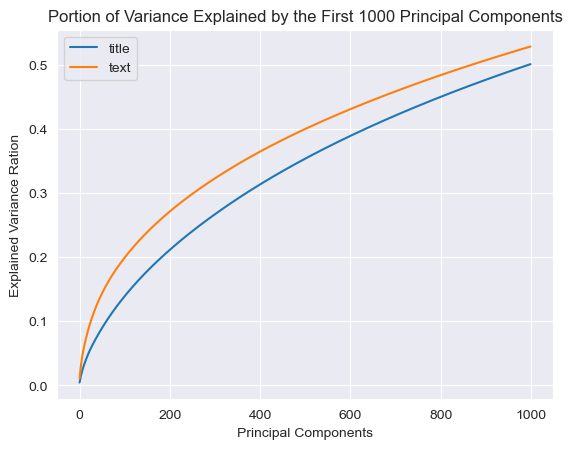

In [186]:
#TODO plot explained variance
fig, ax = plt.subplots(1,1)
sns.lineplot(pcas['title'].explained_variance_ratio_.cumsum(), ax=ax, label = 'title')
sns.lineplot(pcas['text'].explained_variance_ratio_.cumsum(), ax=ax, label = 'text')
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance Ration')
ax.set_title('Portion of Variance Explained by the First 1000 Principal Components')

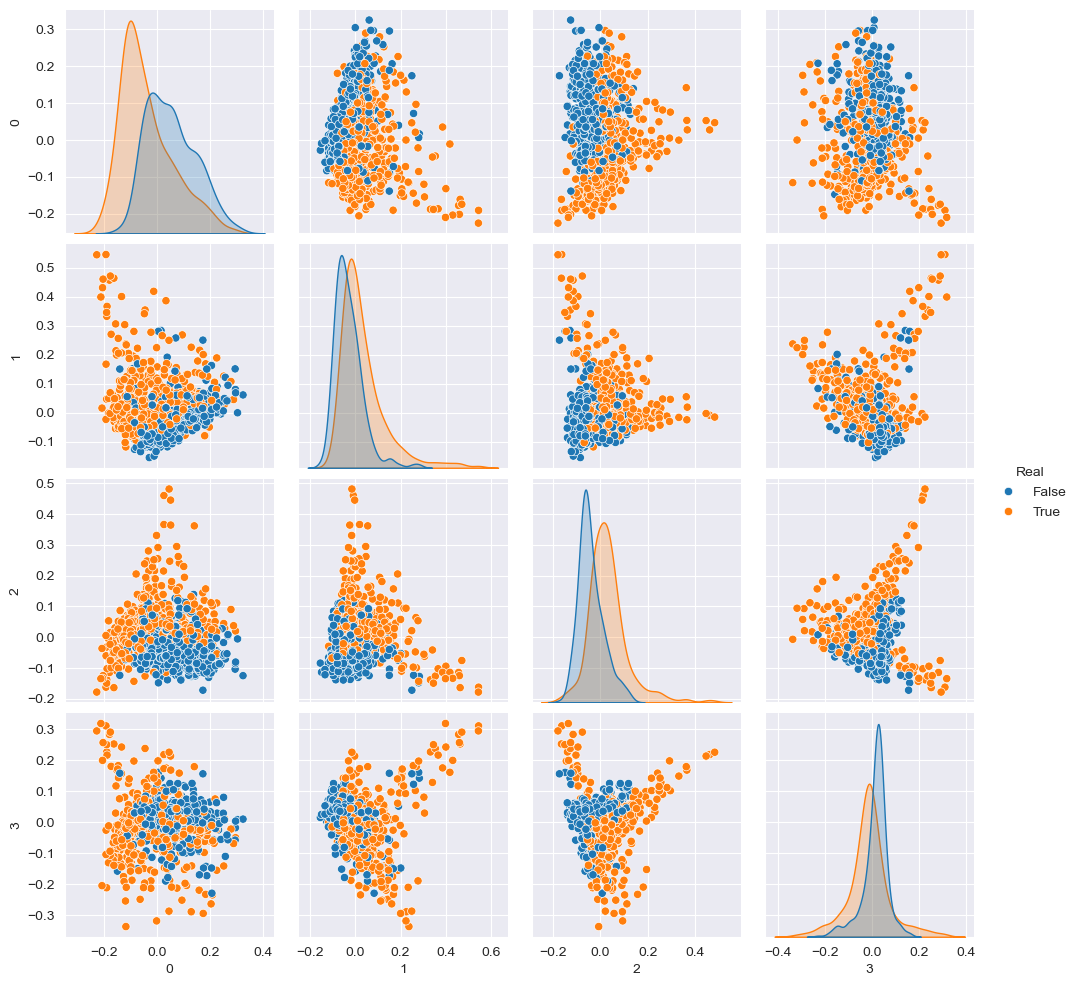

In [190]:
#TODO pairplot first few pcas
sns.pairplot(pcs['text'].sample(1000).loc[:,['Real',0,1,2,3]], hue = 'Real')

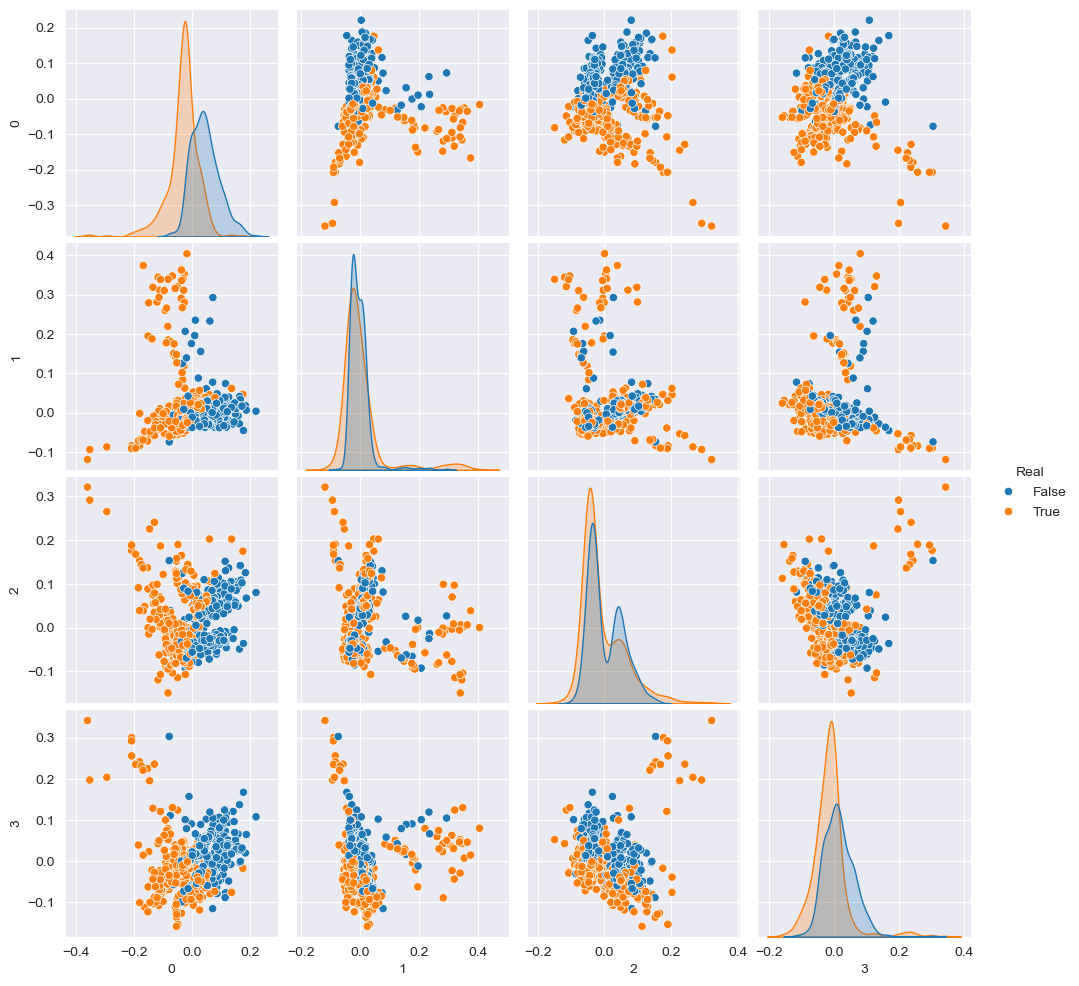

In [191]:
sns.pairplot(pcs['title'].sample(1000).loc[:,['Real',0,1,2,3]], hue = 'Real')

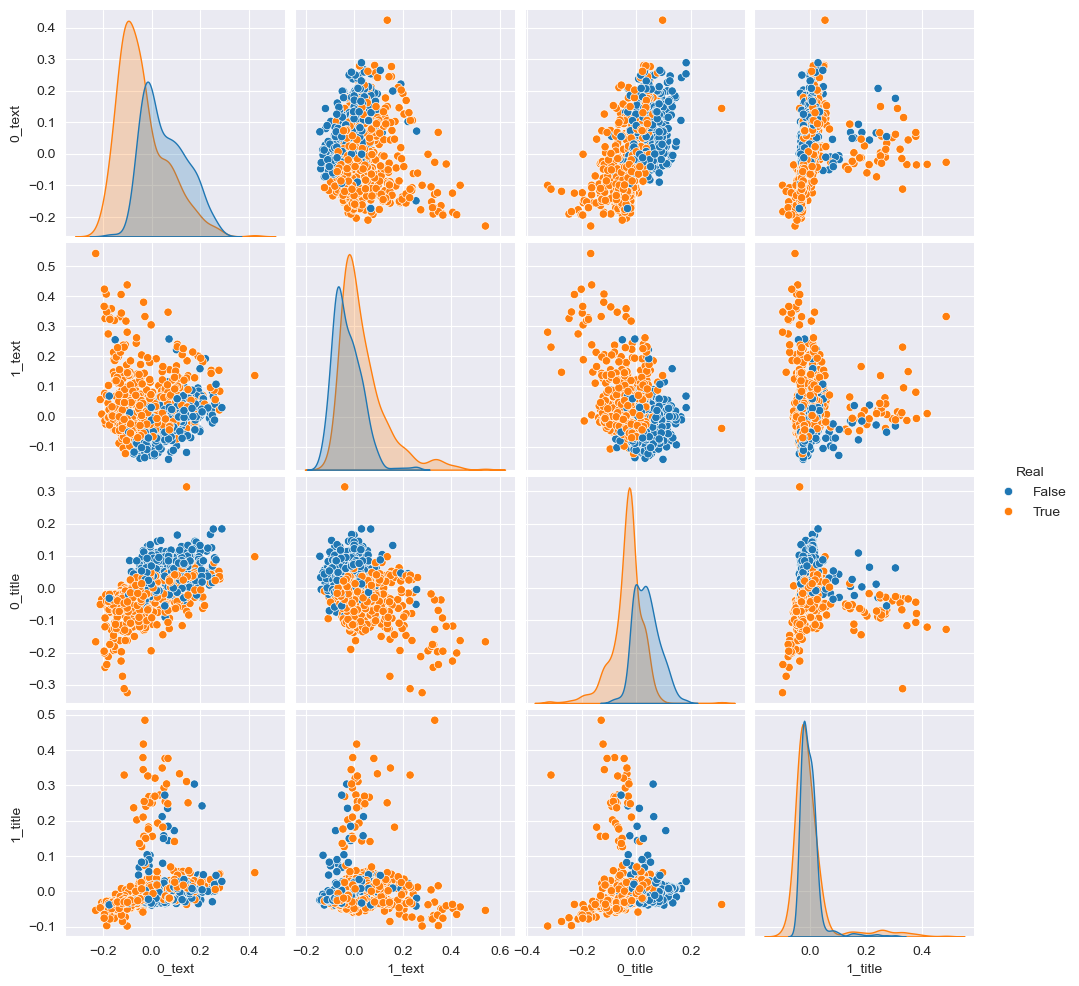

In [196]:
combined_pcs = pcs['text'].loc[:,['Real',0,1]].join(pcs['title'].loc[:,[0,1]], lsuffix='_text', rsuffix='_title')
sns.pairplot(combined_pcs.sample(1000), hue = 'Real')

In [ ]:
#TODO Explore nmf`

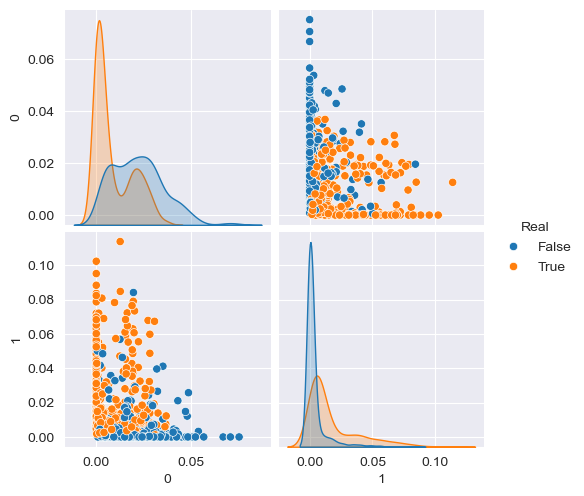

In [205]:
#TODO Explore W
sns.pairplot(Ws['title'][2].sample(1000), hue = 'Real')

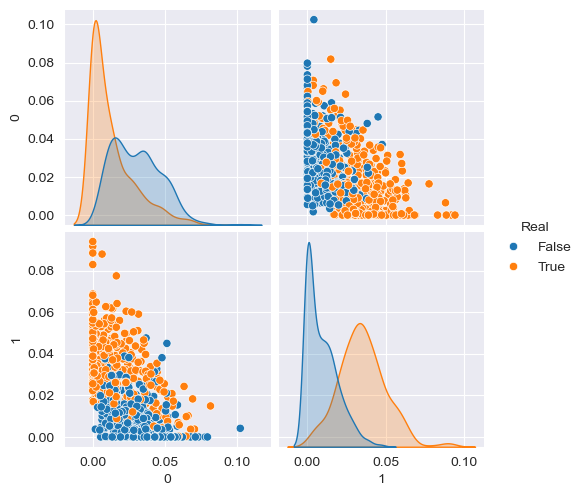

In [207]:
sns.pairplot(Ws['text'][2].sample(1000), hue = 'Real')

In [ ]:
#TODO Explore H

In [212]:
#TODO Barplot top words for each category
Hs['title'][2].T.sort_values(0, ascending = False).head(10)

,0,1
trump,2.894431,0.297143
video,1.795491,0.000000
watch,0.663163,0.000000
obama,0.641926,0.181797
donald,0.603756,0.000000
hillary,0.597797,0.000000
just,0.585804,0.000000
clinton,0.575488,0.007970
president,0.565921,0.037868
campaign,0.334129,0.004628


In [213]:
Hs['title'][2].T.sort_values(1, ascending = False).head(10)

,0,1
says,0.000000,1.817435
house,0.000000,1.393566
white,0.004647,1.048622
korea,0.000000,0.948764
north,0.000000,0.885231
russia,0.081983,0.606019
china,0.000000,0.446911
sanctions,0.000000,0.343247
deal,0.013135,0.336301
tax,0.092517,0.305004


In [214]:
Hs['text'][2].T.sort_values(0, ascending = False).head(10)

,0,1
trump,3.363586,0.000000
clinton,1.021090,0.000000
donald,0.756530,0.018537
president,0.727831,0.431676
republican,0.698121,0.120691
campaign,0.679933,0.014718
hillary,0.597403,0.000000
obama,0.577839,0.229787
white,0.566032,0.140345
said,0.558748,1.476483


In [215]:
Hs['text'][2].T.sort_values(1, ascending = False).head(10)

,0,1
said,0.558748,1.476483
north,0.000000,0.620508
reuters,0.081986,0.616308
state,0.164168,0.612820
government,0.015471,0.610493
korea,0.000000,0.604039
united,0.111231,0.548400
china,0.000000,0.500462
states,0.204875,0.483893
president,0.727831,0.431676


# Modeling

In [267]:
#TODO Construct 4 pipelines
pipelines = {'svc': {'pca': None,
                     'nmf': None},
             'kmeans': {'pca': None,
                        'nmf': None}}

pipelines['svc']['nmf'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                   ('text', TfidfVectorizer(), 1)])),
                                    ('nmf', NMF()),
                                    ('svc', SVC())])
pipelines['svc']['pca'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                   ('text', TfidfVectorizer(), 1)])),
                                    ('pca', NMF()),
                                    ('svc', SVC())])
pipelines['kmeans']['nmf'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                   ('text', TfidfVectorizer(), 1)])),
                                    ('nmf', NMF()),
                                    ('kmeans', KMeans(n_clusters=2))])
pipelines['kmeans']['pca'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                   ('text', TfidfVectorizer(), 1)])),
                                    ('pca', PCA()),
                                    ('kmeans', KMeans(n_clusters=2))])


In [254]:
#TODO Split data into training and validation sets
X_train, X_test, y_train, y_test = tts(X_clean, y_clean.Real, test_size = 0.5, random_state = 42)

In [255]:
#TODO Tune hyperparameters with gridsearch cv

In [256]:
param_grids = {'svc':   {'pca': None,
                        'nmf': None},
           'kmeans':    {'pca': None,
                        'nmf': None}}

In [257]:
gcvs = {'svc':   {'pca': None,
                  'nmf': None},
        'kmeans':    {'pca': None,
                      'nmf': None}}

In [258]:

cv_results = {'svc':   {'pca': None,
                  'nmf': None},
        'kmeans':    {'pca': None,
                      'nmf': None}}


In [269]:
best_estimators = {'svc':   {'pca': None,
                        'nmf': None},
              'kmeans':    {'pca': None,
                            'nmf': None}}


In [259]:

param_grids['svc']['pca'] = {}
param_grids['svc']['pca']['vectorizing__title__lowercase'] = [True, False]
param_grids['svc']['pca']['vectorizing__title__max_features'] = [150, 175, 200]
param_grids['svc']['pca']['vectorizing__text__max_features'] = [125, 150, 175]
param_grids['svc']['pca']['vectorizing__title__ngram_range'] = [(1,1),(1,2)]#[(1,3),(1, 2), (1,1)]
param_grids['svc']['pca']['vectorizing__text__ngram_range'] = [(1,1), (1,2)]#[(1,1),(1, 2), (1,3)]
param_grids['svc']['pca']['vectorizing__text__min_df'] = [1]#[1,2,3]#[2,3,4]
param_grids['svc']['pca']['vectorizing__title__min_df'] = [1]#[1,2,3]#[2,3,4]
param_grids['svc']['pca']['vectorizing__title__max_df'] =[.99]#[.99, .95]
param_grids['svc']['pca']['vectorizing__text__max_df'] = [.99]#[.99, .95]
param_grids['svc']['pca']['svc__kernel'] = ['linear']#['linear', 'rbf']
param_grids['svc']['pca']['svc__C'] = [5,6,7]#[5,6,7]


In [260]:

gcvs['svc']['pca'] = GridSearchCV(pipelines['svc']['pca'],
                           param_grid=param_grids['svc']['pca'],
                           cv = 3, n_jobs = -1,
                           verbose = 100).fit(X_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [261]:

param_grids['svc']['nmf'] = {}
param_grids['svc']['nmf']['vectorizing__title__lowercase'] = [True, False]
param_grids['svc']['nmf']['vectorizing__title__max_features'] = [150,175, 200]
param_grids['svc']['nmf']['vectorizing__text__max_features'] = [125, 150, 175]
param_grids['svc']['nmf']['vectorizing__title__ngram_range'] = [(1,2), (1,1)]#[(1,3),(1, 2), (1,1)]
param_grids['svc']['nmf']['vectorizing__text__ngram_range'] = [(1,1), (1,2)]#[(1,1),(1, 2), (1,3)]
param_grids['svc']['nmf']['vectorizing__text__min_df'] = [1]#[2,3,4]
param_grids['svc']['nmf']['vectorizing__title__min_df'] = [1]#[2,3,4]
param_grids['svc']['nmf']['vectorizing__title__max_df'] =[.99]#[.99, .95]
param_grids['svc']['nmf']['vectorizing__text__max_df'] = [.99]#[.99, .95]
param_grids['svc']['nmf']['nmf__n_components'] = [None]#[None,80,160,200]
param_grids['svc']['nmf']['svc__kernel'] = ['linear']#['linear', 'rbf']
param_grids['svc']['nmf']['svc__C'] = [5, 6, 7]#[5,6,7]


In [262]:

gcvs['svc']['nmf'] = GridSearchCV(pipelines['svc']['nmf'],
                               param_grid=param_grids['svc']['nmf'],
                               cv = 3, n_jobs = -1,
                               verbose = 100).fit(X_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [263]:
param_grids['kmeans']['pca'] = {}
param_grids['kmeans']['pca']['vectorizing__title__lowercase'] = [True, False]
param_grids['kmeans']['pca']['vectorizing__title__max_features'] = [400, 500, 600]#[800, 1600]#[28,30, 32]
param_grids['kmeans']['pca']['vectorizing__text__max_features'] = [400, 500, 600]#[2,3,4]
param_grids['kmeans']['pca']['vectorizing__title__ngram_range'] = [(1,2), (1,3)]#[(1,1), (1,2), (1,3)]
param_grids['kmeans']['pca']['vectorizing__text__ngram_range'] = [(1,2),(1,3)]#[(1,4), (1,3)]
param_grids['kmeans']['pca']['vectorizing__text__min_df'] = [1,2]#[1,2]
param_grids['kmeans']['pca']['vectorizing__title__min_df'] = [1,2]#[5,4,3,2]
param_grids['kmeans']['pca']['vectorizing__text__max_df'] = [.99]#[.99, .98]
param_grids['kmeans']['pca']['vectorizing__title__max_df'] = [.99]#[.99, .98]#[5,4,3,2]
param_grids['kmeans']['pca']['pca__whiten'] = [False]
param_grids['kmeans']['pca']['pca__n_components'] = [None]#[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
param_grids['kmeans']['pca']['kmeans__n_init'] = [1]#[1,2,4]


In [268]:

gcvs['kmeans']['pca'] = GridSearchCV(pipelines['kmeans']['pca'],
                              param_grids['kmeans']['pca'],
                              cv = 3, n_jobs = -1,
                              verbose = 100).fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

In [265]:
param_grids['kmeans']['nmf'] = {}
param_grids['kmeans']['nmf']['vectorizing__title__lowercase'] = [True, False]
param_grids['kmeans']['nmf']['vectorizing__title__max_features'] = [400, 500, 600]#[400,500,600]#[300,400,500]#[800, 1600]#[28,30, 32]
param_grids['kmeans']['nmf']['vectorizing__text__max_features'] = [500, 600, 700]#[600, 700]#[550, 600, 650]#[2,3,4]
param_grids['kmeans']['nmf']['vectorizing__title__ngram_range'] = [(1,1), (1,2)]#[(1,1), (1,2), (1,3)]
param_grids['kmeans']['nmf']['vectorizing__text__ngram_range'] = [(1,2), (1,3)]#[(1,3), (1,2)]#[(1,4), (1,3)]
param_grids['kmeans']['nmf']['vectorizing__text__min_df'] = [1]#[1,2]
param_grids['kmeans']['nmf']['vectorizing__title__min_df'] = [1]#[5,4,3,2]
param_grids['kmeans']['nmf']['vectorizing__text__max_df'] = [.99]#[.99, .98]
param_grids['kmeans']['nmf']['vectorizing__title__max_df'] = [.99]#[.99, .98]#[5,4,3,2]
param_grids['kmeans']['nmf']['nmf__max_iter'] = [1000]
param_grids['kmeans']['nmf']['nmf__n_components'] = [8,10,12]#[2,4,8,10,12,14,16,18]#[10,11]#[11,12,13,14,15]#[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
param_grids['kmeans']['nmf']['nmf__random_state'] = [27]
param_grids['kmeans']['nmf']['nmf__init'] = ['nndsvda']#['nndsvd', 'nndsvda']
param_grids['kmeans']['nmf']['nmf__solver'] = ['cd']#['mu', 'cd']
param_grids['kmeans']['nmf']['kmeans__random_state'] = [27]
param_grids['kmeans']['nmf']['kmeans__init'] = ['k-means++']
param_grids['kmeans']['nmf']['kmeans__n_init'] = [1]#[1,2,4]


In [266]:
gcvs['kmeans']['nmf'] = GridSearchCV(pipelines['kmeans']['nmf'],
                                  param_grids['kmeans']['nmf'],
                                  cv = 5, n_jobs = 14,
                                  verbose = 100).fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
best_estimators['svc']['pca'] = gcvs['svc']['pca'].best_estimator_
best_estimators['svc']['nmf'] = gcvs['svc']['nmf'].best_estimator_
best_estimators['kmeans']['pca'] = gcvs['kmeans']['pca'].best_estimator_
best_estimators['kmeans']['nmf'] = gcvs['kmeans']['nmf'].best_estimator_

In [ ]:
#TODO Plot cv results

In [ ]:
cv_results['svc']['nmf'] = pd.DataFrame(gcvs['svc']['nmf'].cv_results_)
cv_results['svc']['pca'] = pd.DataFrame(gcvs['svc']['pca'].cv_results_)
cv_results['kmeans']['nmf'] = pd.DataFrame(gcvs['kmeans']['nmf'].cv_results_)
cv_results['kmeans']['pca'] = pd.DataFrame(gcvs['kmeans']['pca'].cv_results_)

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=cv_results['svc']['nmf'], x = 'rank_test_score', y = 'mean_test_score', ax = ax, label = 'svc_nmf')
sns.lineplot(data=cv_results['svc']['pca'], x = 'rank_test_score', y = 'mean_test_score', ax = ax, label = 'svc_pca')
sns.lineplot(data=cv_results['kmeans']['nmf'], x = 'rank_test_score', y = 'mean_test_score', ax = ax, label = 'kmeans_nmf')
sns.lineplot(data=cv_results['kmeans']['pca'], x = 'rank_test_score', y = 'mean_test_score', ax = ax, label = 'kmeans_pca')

In [145]:
#TODO Plot confusion matrices
cmd = ConfusionMatrixDisplay()
fig, ax = plt.subplots(2,2)
cmd.from_estimator(best_estimators['svc']['pca'], X_test, y_test, ax = ax[0])
cmd.from_estimator(best_estimators['svc']['nmf'], X_test, y_test, ax = ax[1])
cmd.from_estimator(best_estimators['kmeans']['pca'], X_test, y_test, ax = ax[2])
cmd.from_estimator(best_estimators['kmeans']['nmf'], X_test, y_test, ax = ax[3])

# Results Summary

In [146]:
#TODO Summarize pipeline performances
#TODO Compare models
#TODO Select the best model

# Discussion

In [147]:
#TODO data providence is murky
#TODO find additional datasets to test the data on
#TODO test additional algorithms
#TODO compare to deep learning

# Conclusion

In [148]:
#TODO what was the problem
#TODO what was the data
#TODO how was it cleaned
#TODO how was it preprocessed
#TODO what models were trained
#TODO how were they evaluated
#TODO list results
#TODO list best model

# References

In [149]:
#TODO list references